In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geovoronoi import coords_to_points, points_to_coords, voronoi_regions_from_coords, calculate_polygon_areas,assign_points_to_voronoi_polygons
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
pd.options.mode.chained_assignment = None
import matplotlib.style
import matplotlib as mpl
import logging
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial




# Data Import

In [2]:
data = pd.read_csv("data/Census/ACS_16_5YR_DP03+lat_lon.csv")
data

,Unnamed: 0,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,...,HC01_VC179,HC02_VC179,HC03_VC179,HC04_VC179,HC01_VC180,HC02_VC180,HC03_VC180,HC04_VC180,lat,lon
0,0,8600000US00601,601,ZCTA5 00601,14169,238,14169,NaN,6056,367,...,NaN,NaN,61.3,4.2,NaN,NaN,70.2,4.3,18.180555,-66.749961
1,1,8600000US00602,602,ZCTA5 00602,32545,175,32545,NaN,14707,645,...,NaN,NaN,52.9,3.9,NaN,NaN,66.4,4.5,18.361945,-67.175597
2,2,8600000US00603,603,ZCTA5 00603,41976,692,41976,NaN,16565,677,...,NaN,NaN,48.2,3.0,NaN,NaN,63.9,3.1,18.455183,-67.119887
3,3,8600000US00606,606,ZCTA5 00606,5160,175,5160,NaN,1672,194,...,NaN,NaN,62.4,6.3,NaN,NaN,73.8,7.1,18.158345,-66.932911
4,4,8600000US00610,610,ZCTA5 00610,22916,219,22916,NaN,9914,523,...,NaN,NaN,47.7,4.3,NaN,NaN,60.3,5.5,18.295366,-67.125135
5,5,8600000US00612,612,ZCTA5 00612,51966,1282,51966,NaN,20294,1011,...,NaN,NaN,44.6,2.8,NaN,NaN,65.8,3.4,18.402253,-66.711397
6,6,8600000US00616,616,ZCTA5 00616,8807,873,8807,NaN,3072,507,...,NaN,NaN,45.7,7.1,NaN,NaN,80.7,8.1,18.420412,-66.671979
7,7,8600000US00617,617,ZCTA5 00617,19576,313,19576,NaN,6455,501,...,NaN,NaN,51.0,4.7,NaN,NaN,62.6,7.7,18.445147,-66.559696
8,8,8600000US00622,622,ZCTA5 00622,6136,853,6136,NaN,1654,339,...,NaN,NaN,55.1,11.0,NaN,NaN,58.2,10.1,17.991245,-67.153993
9,9,8600000US00623,623,ZCTA5 00623,34736,867,34736,NaN,12903,776,...,NaN,NaN,46.5,3.7,NaN,NaN,64.7,3.5,18.083361,-67.153897


In [3]:
np.count_nonzero(np.isnan(data['lat']))

0

In [4]:
print(search.by_zipcode(99929)['Latitude'])

NameError: name 'search' is not defined

In [12]:
hospitals = pd.read_csv("data/Hospitals.csv")
type_spec="CHILDREN"
hospitals = hospitals[hospitals['TYPE']==type_spec]


points = np.column_stack((hospitals["X"],hospitals["Y"]))
points = np.unique(points,axis=0)

INFO:geovoronoi:running Voronoi tesselation for 117 points
INFO:geovoronoi:generated 117 Voronoi regions
INFO:geovoronoi:generating Voronoi polygon lines
INFO:geovoronoi:generating Voronoi polygon shapes
INFO:geovoronoi:assigning 117 points to 117 Voronoi polygons


loading country `United States` from naturalearth_lowres
CRS: {'init': 'epsg:4326'}


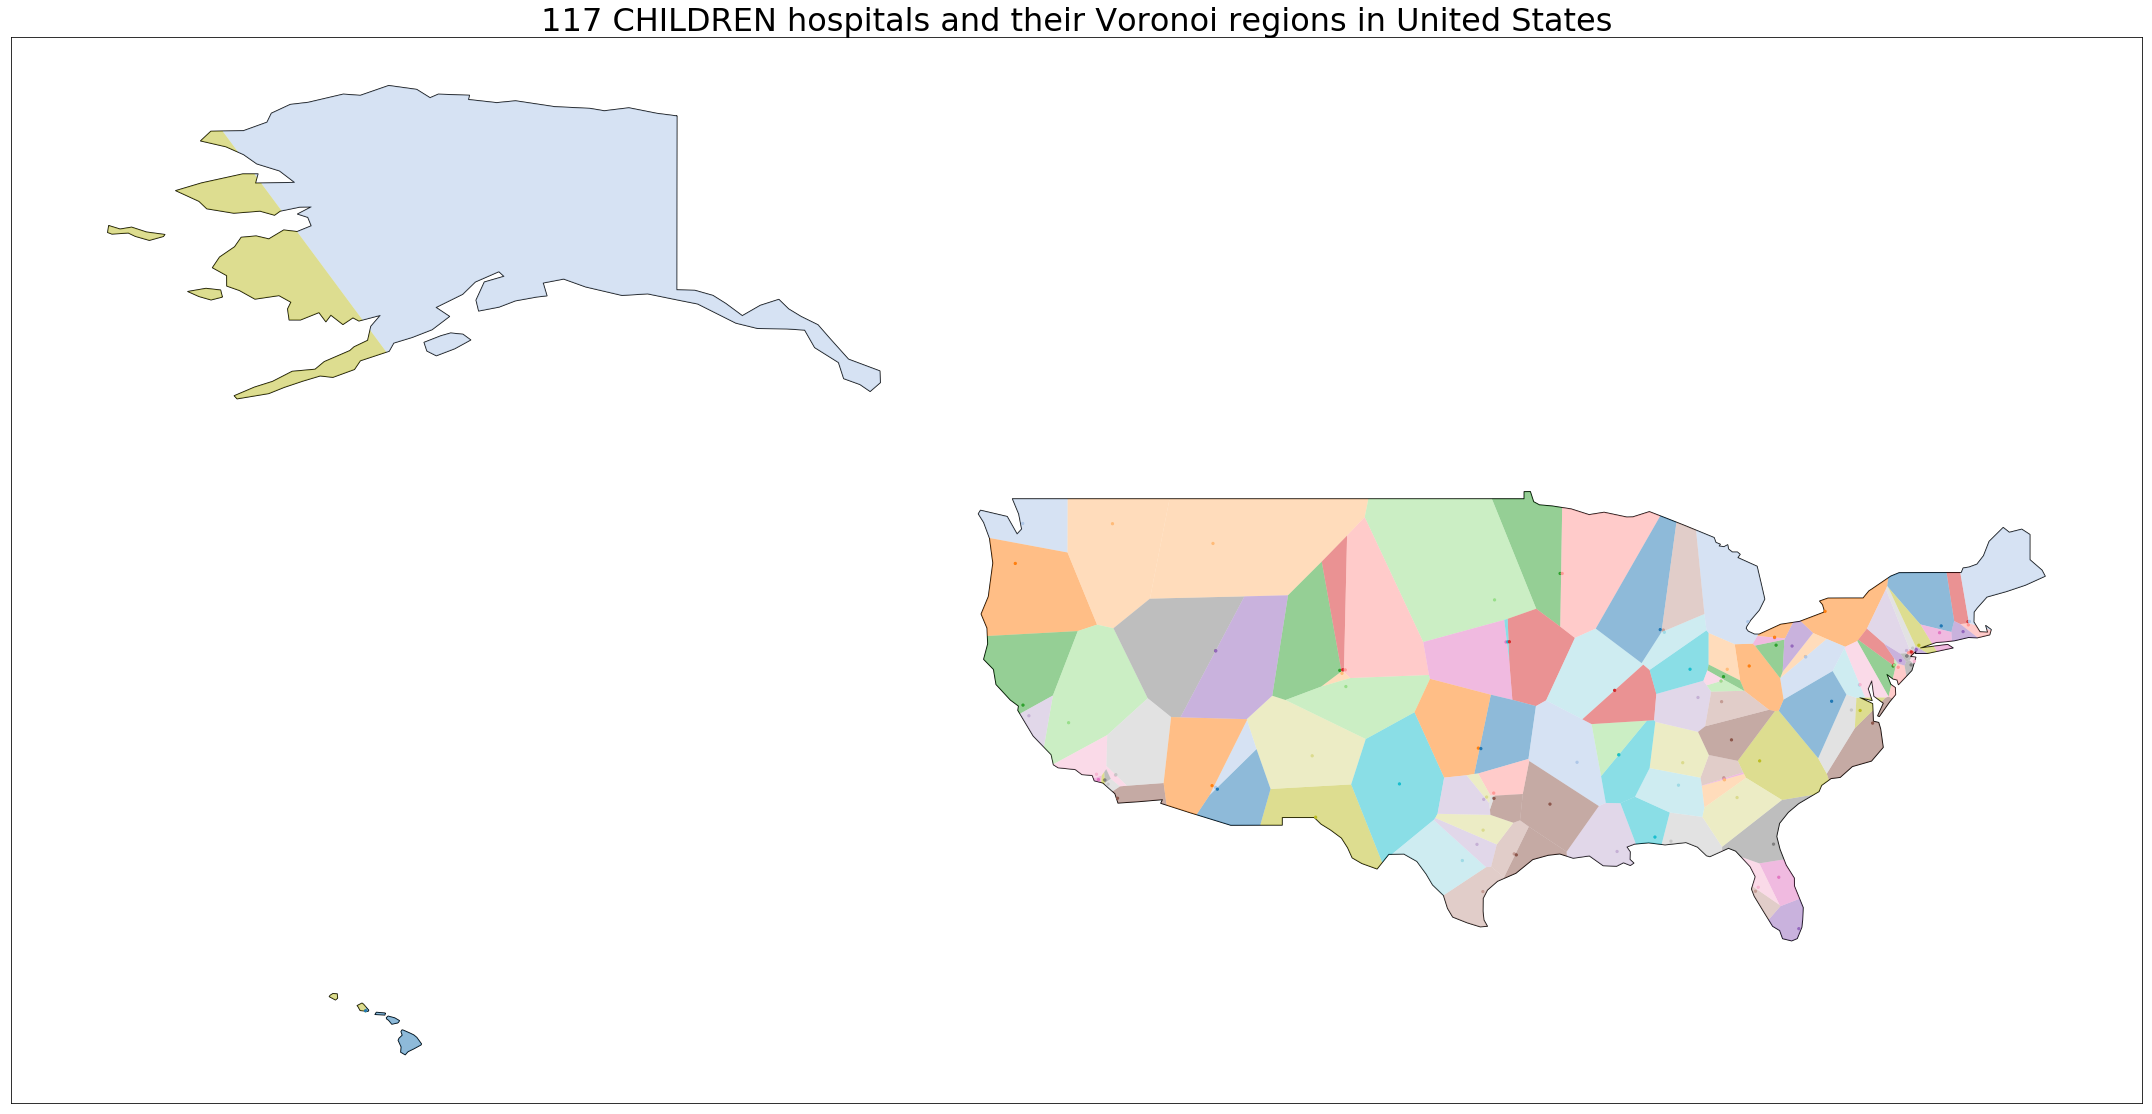

In [15]:
logging.basicConfig(level=logging.INFO)
geovoronoi_log = logging.getLogger('geovoronoi')
geovoronoi_log.setLevel(logging.INFO)
geovoronoi_log.propagate = True

COUNTRY = 'United States'

print('loading country `%s` from naturalearth_lowres' % COUNTRY)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

area = world[world.name == COUNTRY]
assert len(area) == 1

print('CRS:', area.crs)   # gives epsg:4326 -> WGS 84
coords=points

area_shape = area.iloc[0].geometry   # get the Polygon
pts = [p for p in coords_to_points(coords) if p.within(area_shape)]
coords = points_to_coords(pts)
del pts


poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape,return_unassigned_points=False)
poly_areas = calculate_polygon_areas(poly_shapes, m2_to_km2=True)

fig, ax = subplot_for_map(show_x_axis=False, show_y_axis=False,figsize=(30,40))


plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments)

ax.set_title('%d %s hospitals and their Voronoi regions in %s' % (len(pts),type_spec,COUNTRY),fontsize = 32)

plt.tight_layout()
#plt.savefig('random_points_and_area.png')
plt.show()


In [7]:
population = np.column_stack((data['lon'],data['lat']))


def get_area(geom):
    s = shape(geom)
    proj = partial(pyproj.transform, pyproj.Proj(init='epsg:4326'),
                   pyproj.Proj(init='epsg:3857'))

    s_new = transform(proj, s)

    projected_area = transform(proj, s).area
    return projected_area/10000000

poly_areas = calculate_polygon_areas(poly_shapes, m2_to_km2=False)

areas= [get_area(i) for i in poly_shapes]

In [8]:
new_points = np.zeros((len(pts),2))

for i,j in enumerate(pts):
    new_points[i,0] =j.x
    new_points[i,1] = j.y

In [9]:
from scipy.spatial import cKDTree
def find_n_c2(lat_long,pop,facility):
    '''compute population in the voronoi cell of each facility and return an array'''
    
    n=0
    voronoi_kdtree = cKDTree(facility) #computes ckdtree
    
    # distance, and region
    test_point_dist, test_point_regions = voronoi_kdtree.query(lat_long, k=1) 
    
    
    # compute number of people in cell
    bin_pop = np.ones(len(facility),dtype = int)
    
    # population from each zip to each facility
    print(len(lat_long))
    print(len(pop))
    print(len(facility))

    for i in range(len(lat_long)-1):
        if test_point_regions[i]!= len(facility):
            bin_pop[test_point_regions[i]]+= pop[i]
        
    # compute distance
    bin_distance = np.zeros(len(pop))
    
    # total distance
    for i in range(len(pop)):
        bin_distance[test_point_regions[i]]+= test_point_dist[i]*pop[i]
    
    n = np.sum(bin_pop)
    c = np.sum(bin_distance)
    return bin_pop ,bin_distance, test_point_regions,n,c
bin_pop,bin_distance,test_point_regions,n,c = find_n_c2(population,data["HC01_VC03"].values,new_points)


33120
33120
117


In [10]:
newbin=bin_pop[bin_pop !=1]
areas = np.array(areas)
newareas = areas[bin_pop !=1]

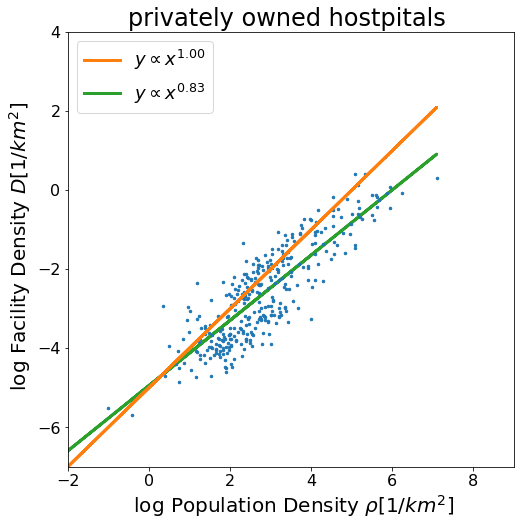

In [161]:
logx = np.log10(newbin/newareas)
logy = np.log10(1/newareas)


from scipy.optimize import curve_fit

def power_func(x,*a):
    '''power function.'''
    return a[0]+x*a[1]



a2,a2_cov = curve_fit(power_func,logx,logy,p0=(11.1,1))
plt.style.use("danforth")
plt.figure(figsize=(8,8))
plt.plot( logx,logy,'.',ms=5)
plt.plot(logx,logx-5,label=r"$y\propto x^{1.00}$")
plt.plot(logx,power_func(logx,*a2),label = r'$y \propto x^{%.2f}$'%(a2[1]),zorder=0)
plt.xlim([-2,9])
plt.ylim([-7,4])
plt.title("privately owned hostpitals ")
plt.xlabel(r' log Population Density $\rho [1/km^2]$')
plt.ylabel(r' log Facility Density $D [1/km^2]$')
plt.legend(loc =2,fontsize = 18)
plt.show()




In [27]:
plt.style.reload_library() 

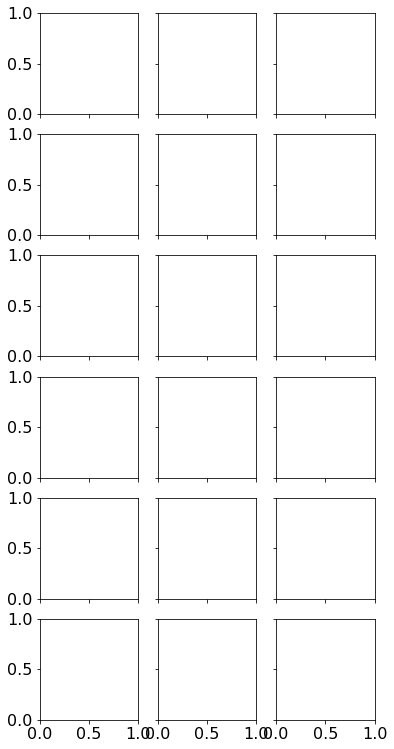

AxesSubplot(0.398529,0.642714;0.227941x0.107857)


In [190]:
numplots =20
columns =3
fig,ax = plt.subplots(numplots//columns,columns, sharex=True, sharey=True,figsize = (6,2*numplots//columns))
for i in ax:
    for j in i:
        j.axis('on')
plt.show()
print(ax[1,1])

In [208]:
[i for i in hospitals]

['X',
 'Y',
 'OBJECTID',
 'ID',
 'NAME',
 'ADDRESS',
 'ADDRESS2',
 'CITY',
 'STATE',
 'ZIP',
 'ZIP4',
 'TELEPHONE',
 'TYPE',
 'STATUS',
 'POPULATION',
 'COUNTY',
 'COUNTYFIPS',
 'COUNTRY',
 'LATITUDE',
 'LONGITUDE',
 'NAICS_CODE',
 'NAICS_DESC',
 'SOURCE',
 'SOURCEDATE',
 'VAL_METHOD',
 'VAL_DATE',
 'WEBSITE',
 'STATE_ID',
 'ALT_NAME',
 'ST_FIPS',
 'OWNER',
 'TTL_STAFF',
 'BEDS',
 'TRAUMA',
 'HELIPAD',
 'DATECREATE']

In [217]:
len(hospitals)

352